**install the dependencies**

In [2]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit-optimization qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.1/237.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Fetching data and trying to run IBM aimulator**

Using 2 binary slack variables per trip
Quadratic program created with binary slack variables:
Number of variables: 14
Error accessing IBM Quantum: "Unable to find account. Please make sure an account with the channel name 'ibm_quantum_platform' is saved."
Falling back to simulator
Running QAOA on IBM Quantum hardware with pass_manager...
Iteration 1: Energy = (-351.8367008789061+0j)
Iteration 2: Energy = (-238.84656181640668+0j)
Iteration 3: Energy = (19.378865136718645+0j)
Iteration 4: Energy = (-967.827614062501+0j)
Iteration 5: Energy = (-1637.9917539062506+0j)
Iteration 6: Energy = (-405.0234674804684+0j)
Iteration 7: Energy = (-5.2914883789061395+0j)
Iteration 8: Energy = (-83.43267226562493+0j)
Iteration 9: Energy = (-516.4355617187496+0j)
Iteration 10: Energy = (-444.2177784179688+0j)
Iteration 11: Energy = (318.44443222656247+0j)
Iteration 12: Energy = (214.42413164062518+0j)
Iteration 13: Energy = (-1239.8107550781265+0j)
Iteration 14: Energy = (1294.6377271484387+0j)
Iterati

base_primitive._run:WARNING:2025-09-11 11:42:47,753: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


Iteration 28: Energy = (-2045.857873242189+0j)
Iteration 29: Energy = (-1994.2912169921844+0j)
Iteration 30: Energy = (-2046.1903103515633+0j)
Iteration 31: Energy = (-1188.75366923828+0j)
Finished in 5.929 s. Status: OptimizationResultStatus.SUCCESS
QuadraticProgram objective (raw): 181.099000

Solution interpretation:
Variable values:
  x_DT_1: 1.0
  x_DT_2: 0.0
  x_GR_1: 1.0
  x_GR_2: 0.0
  x_R2_1: 0.0
  x_R2_2: 1.0
  x_R3_2_1: 1.0
  x_R3_2_2: 0.0
  x_IT_1: 0.0
  x_IT_2: 1.0
  s_1_0: 0.0
  s_1_1: 0.0
  s_2_0: 1.0
  s_2_1: 0.0
Trip 1 slack (binary decoded): 0
Trip 2 slack (binary decoded): 1

Patient assignments:
Trip 1: ['DT', 'GR', 'R3_2'] (Capacity used: 3/3, Slack: 0)
  Constraint check: 3 + 0 = 3 (should be 3)
Trip 2: ['R2', 'IT'] (Capacity used: 2/3, Slack: 1)
  Constraint check: 2 + 1 = 3 (should be 3)
Trip 1 optimal route: H -> DT -> GR -> R3_2 -> H, Distance: 28.4563 km
Trip 2 optimal route: H -> IT -> R2 -> H, Distance: 28.8548 km

Total distance: 57.3111 km

Constraint sat

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


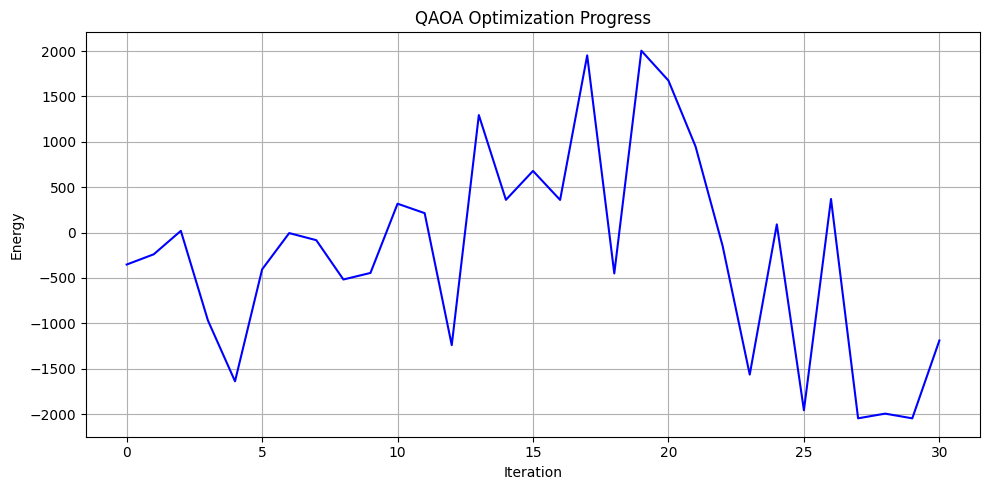

In [ ]:
# -------------------------
# QAOA with assignment formulation and binary slack variables
# Running on IBM Quantum Hardware with pass_manager
# -------------------------
import time
import math
import itertools
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from math import isfinite
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit import transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler

# -------------------------
# Problem data
# -------------------------
data = {
  "problem_description": {"constraints": {"stops_per_trip": 3}},
  "locations": {
    "hospital": {"name":"Central Hospital","coordinates":{"latitude":29.99512653425452,"longitude":31.68462840171934}},
    "patients":[
      {"id":"DT","coordinates":{"latitude":30.000417586266437,"longitude":31.73960813272627}},
      {"id":"GR","coordinates":{"latitude":30.011344405285193,"longitude":31.747827362371993}},
      {"id":"R2","coordinates":{"latitude":30.030388325206854,"longitude":31.669231198639675}},
      {"id":"R3_2","coordinates":{"latitude":30.030940768851426,"longitude":31.688371339937028}},
      {"id":"IT","coordinates":{"latitude":30.01285635906825,"longitude":31.693811715848444}}
    ]
  }
}

hospital = data["locations"]["hospital"]["coordinates"]
patients = data["locations"]["patients"]
ids = [p["id"] for p in patients]
coord_map = {"H": (hospital["latitude"], hospital["longitude"])}
for p in patients:
    coord_map[p["id"]] = (p["coordinates"]["latitude"], p["coordinates"]["longitude"])

# -------------------------
# Distance matrix
# -------------------------
distance_dict = {
    'H': {'H': 0.0, 'DT': 8.6285, 'GR': 11.4958, 'R2': 9.4454, 'R3_2': 10.8524, 'IT': 9.6724},
    'DT': {'H': 14.1936, 'DT': 0.0, 'GR': 2.3608, 'R2': 10.922, 'R3_2': 9.238, 'IT': 9.4305},
    'GR': {'H': 17.7848, 'DT': 7.7452, 'GR': 0.0, 'R2': 11.8083, 'R3_2': 10.1243, 'IT': 10.478},
    'R2': {'H': 11.8644, 'DT': 19.6719, 'GR': 15.6608, 'R2': 0.0, 'R3_2': 11.5718, 'IT': 11.5385},
    'R3_2': {'H': 7.3427, 'DT': 12.1719, 'GR': 10.0531, 'R2': 4.0711, 'R3_2': 0.0, 'IT': 5.9308},
    'IT': {'H': 9.2692, 'DT': 9.3984, 'GR': 12.2657, 'R2': 7.318, 'R3_2': 8.725, 'IT': 0.0}
}

# -------------------------
# Problem parameters
# -------------------------
n_trips = 2
max_stops = data["problem_description"]["constraints"]["stops_per_trip"]
patients = ids
hospital_id = "H"

# -------------------------
# Build QuadraticProgram with assignment formulation and binary slack variables
# -------------------------
qp = QuadraticProgram()

# Create binary variables for each patient-trip assignment
for p in patients:
    for t in range(1, n_trips + 1):
        qp.binary_var(name=f"x_{p}_{t}")

# Create binary slack variables for capacity constraints
slack_bits_per_trip = math.ceil(math.log2(max_stops + 1))
print(f"Using {slack_bits_per_trip} binary slack variables per trip")

for t in range(1, n_trips + 1):
    for i in range(slack_bits_per_trip):
        qp.binary_var(name=f"s_{t}_{i}")

# Objective function: minimize total distance
linear_terms = {}
for p in patients:
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        linear_terms[var_name] = distance_dict[hospital_id][p] + distance_dict[p][hospital_id]

# Quadratic terms: distances between patients in the same trip
quadratic_terms = {}
for t in range(1, n_trips + 1):
    for i, p1 in enumerate(patients):
        for j, p2 in enumerate(patients):
            if i < j:
                var1 = f"x_{p1}_{t}"
                var2 = f"x_{p2}_{t}"
                quadratic_terms[(var1, var2)] = distance_dict[p1][p2] + distance_dict[p2][p1]

# Set the objective
qp.minimize(linear=linear_terms, quadratic=quadratic_terms)

# Constraints
for p in patients:
    vars_for_patient = [f"x_{p}_{t}" for t in range(1, n_trips + 1)]
    coeffs = {var: 1 for var in vars_for_patient}
    qp.linear_constraint(linear=coeffs, sense='==', rhs=1, name=f"assign_{p}")

for t in range(1, n_trips + 1):
    vars_for_trip = [f"x_{p}_{t}" for p in patients]
    slack_vars = [f"s_{t}_{i}" for i in range(slack_bits_per_trip)]

    coeffs = {var: 1 for var in vars_for_trip}
    for i, slack_var in enumerate(slack_vars):
        coeffs[slack_var] = 2**i

    qp.linear_constraint(linear=coeffs, sense='==', rhs=max_stops, name=f"capacity_{t}")

print("Quadratic program created with binary slack variables:")
print(f"Number of variables: {qp.get_num_vars()}")

# -------------------------
# Setup for IBM Quantum Hardware with pass_manager
# -------------------------
# Initialize IBM Quantum account (requires prior setup with IBM Quantum token)
try:
    service = QiskitRuntimeService()
    # Get the least busy backend with enough qubits
    backends = service.backends(
        simulator=False,
        operational=True,
        min_num_qubits=14
    )

    # Sort by least busy
    backends_sorted = sorted(backends, key=lambda x: x.status().pending_jobs)
    backend = backends_sorted[0]
    print(f"Using backend: {backend.name}")
    print(f"Pending jobs: {backend.status().pending_jobs}")

    # Create a pass manager for the backend
    # Use optimization_level=1 to reduce circuit depth while maintaining hardware compatibility
    target = backend.target
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

except Exception as e:
    print(f"Error accessing IBM Quantum: {e}")
    print("Falling back to simulator")
    from qiskit_aer import AerSimulator
    backend = AerSimulator()
    # Create a pass manager for the simulator
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

# -------------------------
# Configure QAOA for hardware with pass_manager
# -------------------------
# Track optimization progress
loss_history = []

def callback(eval_count, parameters, mean, std):
    loss_history.append(mean)
    print(f"Iteration {eval_count}: Energy = {mean}")

# Use COBYLA optimizer
optimizer = COBYLA(maxiter=50)

# Configure QAOA with fewer repetitions to reduce circuit depth
reps = 1


# -------------------------
# Solve using Qiskit Runtime with pass_manager
# -------------------------
print("Running QAOA on IBM Quantum hardware with pass_manager...")
t0 = time.time()

try:
    with Session(backend=backend) as session:
        # Create a QAOA instance with pass_manager
        qaoa = QAOA(
            sampler=Sampler(mode=backend),
            optimizer=optimizer,
            reps=reps,
            initial_point=[0.1, 0.1],  # Good starting parameters
            callback=callback,
            pass_manager=pm  # Add pass_manager to handle transpilation
        )

        # Create optimizer and solve
        meo = MinimumEigenOptimizer(qaoa)
        result = meo.solve(qp)

except Exception as e:
    print(f"Error with Qiskit Runtime: {e}")
    print("Falling back to local execution with pass_manager")

    # Fallback to local execution
    from qiskit_aer.primitives import Sampler as AerSampler

    qaoa = QAOA(
        sampler=AerSampler(),
        optimizer=optimizer,
        reps=reps,
        initial_point=[0.1, 0.1],
        callback=callback,
        pass_manager=pm  # Use pass_manager for local execution too
    )

    meo = MinimumEigenOptimizer(qaoa)
    result = meo.solve(qp)

t1 = time.time()
elapsed = t1 - t0

print(f"Finished in {elapsed:.3f} s. Status: {result.status}")
print(f"QuadraticProgram objective (raw): {result.fval:.6f}")

# -------------------------
# Extract and interpret solution
# -------------------------
print("\nSolution interpretation:")
print("Variable values:")
for var_name, value in result.variables_dict.items():
    print(f"  {var_name}: {value}")

# Extract which patients are assigned to which trips
assignments = {}
for t in range(1, n_trips + 1):
    assignments[t] = []
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignments[t].append(p)

# Extract and decode binary slack variables
slack_values = {}
for t in range(1, n_trips + 1):
    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i
    slack_values[t] = slack_binary
    print(f"Trip {t} slack (binary decoded): {slack_binary}")

print("\nPatient assignments:")
for t, patients_in_trip in assignments.items():
    capacity_used = len(patients_in_trip)
    slack_value = slack_values.get(t, 0)
    print(f"Trip {t}: {patients_in_trip} (Capacity used: {capacity_used}/3, Slack: {slack_value})")
    print(f"  Constraint check: {capacity_used} + {slack_value} = {capacity_used + slack_value} (should be 3)")

# Calculate actual distance for each trip
total_distance = 0
trip_details = {}
for t, patients_in_trip in assignments.items():
    if not patients_in_trip:
        continue

    # Find optimal permutation for this trip
    best_perm = None
    best_distance = float('inf')

    for perm in itertools.permutations(patients_in_trip):
        dist = distance_dict[hospital_id][perm[0]]
        for i in range(len(perm) - 1):
            dist += distance_dict[perm[i]][perm[i+1]]
        dist += distance_dict[perm[-1]][hospital_id]

        if dist < best_distance:
            best_distance = dist
            best_perm = perm

    total_distance += best_distance
    trip_details[t] = {
        'patients': best_perm,
        'distance': best_distance
    }

    print(f"Trip {t} optimal route: H -> {' -> '.join(best_perm)} -> H, Distance: {best_distance:.4f} km")

print(f"\nTotal distance: {total_distance:.4f} km")

# Check constraint satisfaction
constraints_satisfied = True
print("\nConstraint satisfaction check:")

# Check patient assignment constraints
for p in patients:
    assignment_count = 0
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignment_count += 1
    print(f"Patient {p} assigned to {assignment_count} trips: {'OK' if assignment_count == 1 else 'VIOLATION'}")
    if assignment_count != 1:
        constraints_satisfied = False

# Check capacity constraints with binary slack
for t in range(1, n_trips + 1):
    patient_count = 0
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            patient_count += 1

    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i

    constraint_value = patient_count + slack_binary
    print(f"Trip {t}: {patient_count} patients + {slack_binary} slack = {constraint_value}: {'OK' if constraint_value == max_stops else 'VIOLATION'}")
    if constraint_value != max_stops:
        constraints_satisfied = False

print(f"\nAll constraints satisfied: {constraints_satisfied}")

# -------------------------
# Plot loss curve
# -------------------------
if loss_history:
    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, 'b-', linewidth=1.5)
    plt.title('QAOA Optimization Progress')
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('qaoa_loss_curve_hardware.png')
    plt.show()
else:
    print("No loss history recorded")

Saving the IBM credantials

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

IBM_API_KEY = "OOwlo7E2TD7cbrxrDlYvzo9vT3RFHHw95QeRgeSwH50i"
SERVICE_CRN = "crn:v1:bluemix:public:quantum-computing:us-east:a/3ff804ab3cd148d684d3d710c3ed458b:a4282910-a8bb-4b34-950d-47d494c80026::"

# Save account
QiskitRuntimeService.save_account(channel="ibm_cloud", token=IBM_API_KEY, instance=SERVICE_CRN, overwrite=True)

# Connect to service
service = QiskitRuntimeService(channel="ibm_cloud")
print("Connected to IBM Quantum service:", service)


Connected to IBM Quantum service: <QiskitRuntimeService>


Final attemp with saving in the evidence folder

In [ ]:
import os
import csv
import json
from datetime import datetime

import time
import math
import itertools
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from math import isfinite
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.minimum_eigensolvers import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit import transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler

# -------------------------
# Problem data
# -------------------------
data = {
  "problem_description": {"constraints": {"stops_per_trip": 3}},
  "locations": {
    "hospital": {"name":"Central Hospital","coordinates":{"latitude":29.99512653425452,"longitude":31.68462840171934}},
    "patients":[
      {"id":"DT","coordinates":{"latitude":30.000417586266437,"longitude":31.73960813272627}},
      {"id":"GR","coordinates":{"latitude":30.011344405285193,"longitude":31.747827362371993}},
      {"id":"R2","coordinates":{"latitude":30.030388325206854,"longitude":31.669231198639675}},
      {"id":"R3_2","coordinates":{"latitude":30.030940768851426,"longitude":31.688371339937028}},
      {"id":"IT","coordinates":{"latitude":30.01285635906825,"longitude":31.693811715848444}}
    ]
  }
}

hospital = data["locations"]["hospital"]["coordinates"]
patients = data["locations"]["patients"]
ids = [p["id"] for p in patients]
coord_map = {"H": (hospital["latitude"], hospital["longitude"])}
for p in patients:
    coord_map[p["id"]] = (p["coordinates"]["latitude"], p["coordinates"]["longitude"])

# -------------------------
# Distance matrix
# -------------------------
distance_dict = {
    'H': {'H': 0.0, 'DT': 8.6285, 'GR': 11.4958, 'R2': 9.4454, 'R3_2': 10.8524, 'IT': 9.6724},
    'DT': {'H': 14.1936, 'DT': 0.0, 'GR': 2.3608, 'R2': 10.922, 'R3_2': 9.238, 'IT': 9.4305},
    'GR': {'H': 17.7848, 'DT': 7.7452, 'GR': 0.0, 'R2': 11.8083, 'R3_2': 10.1243, 'IT': 10.478},
    'R2': {'H': 11.8644, 'DT': 19.6719, 'GR': 15.6608, 'R2': 0.0, 'R3_2': 11.5718, 'IT': 11.5385},
    'R3_2': {'H': 7.3427, 'DT': 12.1719, 'GR': 10.0531, 'R2': 4.0711, 'R3_2': 0.0, 'IT': 5.9308},
    'IT': {'H': 9.2692, 'DT': 9.3984, 'GR': 12.2657, 'R2': 7.318, 'R3_2': 8.725, 'IT': 0.0}
}

# -------------------------
# Problem parameters
# -------------------------
n_trips = 2
max_stops = data["problem_description"]["constraints"]["stops_per_trip"]
patients = ids
hospital_id = "H"

# -------------------------
# Build QuadraticProgram with assignment formulation and binary slack variables
# -------------------------
qp = QuadraticProgram()

# Create binary variables for each patient-trip assignment
for p in patients:
    for t in range(1, n_trips + 1):
        qp.binary_var(name=f"x_{p}_{t}")

# Create binary slack variables for capacity constraints
slack_bits_per_trip = math.ceil(math.log2(max_stops + 1))
print(f"Using {slack_bits_per_trip} binary slack variables per trip")

for t in range(1, n_trips + 1):
    for i in range(slack_bits_per_trip):
        qp.binary_var(name=f"s_{t}_{i}")

# Objective function: minimize total distance
linear_terms = {}
for p in patients:
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        linear_terms[var_name] = distance_dict[hospital_id][p] + distance_dict[p][hospital_id]

# Quadratic terms: distances between patients in the same trip
quadratic_terms = {}
for t in range(1, n_trips + 1):
    for i, p1 in enumerate(patients):
        for j, p2 in enumerate(patients):
            if i < j:
                var1 = f"x_{p1}_{t}"
                var2 = f"x_{p2}_{t}"
                quadratic_terms[(var1, var2)] = distance_dict[p1][p2] + distance_dict[p2][p1]

# Set the objective
qp.minimize(linear=linear_terms, quadratic=quadratic_terms)

# Constraints
for p in patients:
    vars_for_patient = [f"x_{p}_{t}" for t in range(1, n_trips + 1)]
    coeffs = {var: 1 for var in vars_for_patient}
    qp.linear_constraint(linear=coeffs, sense='==', rhs=1, name=f"assign_{p}")

for t in range(1, n_trips + 1):
    vars_for_trip = [f"x_{p}_{t}" for p in patients]
    slack_vars = [f"s_{t}_{i}" for i in range(slack_bits_per_trip)]

    coeffs = {var: 1 for var in vars_for_trip}
    for i, slack_var in enumerate(slack_vars):
        coeffs[slack_var] = 2**i

    qp.linear_constraint(linear=coeffs, sense='==', rhs=max_stops, name=f"capacity_{t}")

print("Quadratic program created with binary slack variables:")
print(f"Number of variables: {qp.get_num_vars()}")

# -------------------------
# Setup for IBM Quantum Hardware with pass_manager
# -------------------------
# Initialize IBM Quantum account
try:
    service = QiskitRuntimeService()
    # Get the least busy backend with enough qubits
    backends = service.backends(
        simulator=False,
        operational=True,
        min_num_qubits=14
    )

    # Sort by least busy
    backends_sorted = sorted(backends, key=lambda x: x.status().pending_jobs)
    backend = backends_sorted[0]
    print(f"Using backend: {backend.name}")
    print(f"Pending jobs: {backend.status().pending_jobs}")

    # Create a pass manager for the backend
    # Use optimization_level=1 to reduce circuit depth while maintaining hardware compatibility
    target = backend.target
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

except Exception as e:
    print(f"Error accessing IBM Quantum: {e}")
    print("Falling back to simulator")
    from qiskit_aer import AerSimulator
    backend = AerSimulator()
    # Create a pass manager for the simulator
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

# -------------------------
# Configure QAOA for hardware with pass_manager
# -------------------------
# Track optimization progress
loss_history = []

def callback(eval_count, parameters, mean, std):
    loss_history.append(mean)
    print(f"Iteration {eval_count}: Energy = {mean}")

# Use COBYLA optimizer
optimizer = COBYLA(maxiter=50)

# Configure QAOA with fewer repetitions to reduce circuit depth
reps = 1


# -------------------------
# Solve using Qiskit Runtime with pass_manager
# -------------------------
print("Running QAOA on IBM Quantum hardware with pass_manager...")
t0 = time.time()

try:
    with Session(backend=backend) as session:
        # Create a QAOA instance with pass_manager
        qaoa = QAOA(
            sampler=Sampler(mode=backend),
            optimizer=optimizer,
            reps=reps,
            initial_point=[0.1, 0.1],  # Good starting parameters
            callback=callback,
            pass_manager=pm  # Add pass_manager to handle transpilation
        )

        # Create optimizer and solve
        meo = MinimumEigenOptimizer(qaoa)
        result = meo.solve(qp)

except Exception as e:
    print(f"Error with Qiskit Runtime: {e}")
    print("Falling back to local execution with pass_manager")

    # Fallback to local execution
    from qiskit_aer.primitives import Sampler as AerSampler

    qaoa = QAOA(
        sampler=AerSampler(),
        optimizer=optimizer,
        reps=reps,
        initial_point=[0.1, 0.1],
        callback=callback,
        pass_manager=pm  # Use pass_manager for local execution too
    )

    meo = MinimumEigenOptimizer(qaoa)
    result = meo.solve(qp)

t1 = time.time()
elapsed = t1 - t0

print(f"Finished in {elapsed:.3f} s. Status: {result.status}")
print(f"QuadraticProgram objective (raw): {result.fval:.6f}")

# -------------------------
# Evidence collection
# -------------------------

# Create evidence folder structure
evidence_dir = "evidence"
logs_dir = os.path.join(evidence_dir, "logs")
screenshots_dir = os.path.join(evidence_dir, "screenshots")
os.makedirs(logs_dir, exist_ok=True)
os.makedirs(screenshots_dir, exist_ok=True) 

# 1. Save job_ids.csv
job_ids_path = os.path.join(evidence_dir, "job_ids.csv")

# Try to capture job ID if available from backend run
job_id = None
try:
    if hasattr(result, "min_eigen_solver_result"):
        solver_result = result.min_eigen_solver_result
        if hasattr(solver_result, "raw_result") and hasattr(solver_result.raw_result, "job"):
            job_id = solver_result.raw_result.job.job_id()
except Exception:
    pass

with open(job_ids_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["timestamp", "backend", "job_id", "mode", "shots", "notes"])
    writer.writerow([
        datetime.utcnow().isoformat() + "Z",
        backend.name,
        job_id if job_id else "N/A",
        "physical" if not backend.configuration().simulator else "simulator",
        backend.configuration().max_shots if hasattr(backend, "configuration") else "N/A",
        "Final run"
    ])

# 2. Save runtime logs (everything we printed can be captured into a log file)
log_file_path = os.path.join(logs_dir, "runtime_log.txt")
with open(log_file_path, "w") as log_file:
    log_file.write("QAOA run evidence log\n")
    log_file.write(f"Backend: {backend.name}\n")
    log_file.write(f"Result status: {result.status}\n")
    log_file.write(f"Objective value: {result.fval}\n")
    log_file.write("\nVariables:\n")
    for var_name, value in result.variables_dict.items():
        log_file.write(f"  {var_name}: {value}\n")
    log_file.write("\nAssignments per trip:\n")
    for t, patients_in_trip in assignments.items():
        log_file.write(f"Trip {t}: {patients_in_trip}\n")
    log_file.write(f"Total distance: {total_distance}\n")

# 3. Create MANIFEST.json at project root
manifest = {
    "team": "YOUR_TEAM_CODE",  # fill with your team code
    "version": "1.0.0",
    "backend": backend.name,
    "min_qubits": backend.configuration().num_qubits if hasattr(backend, "configuration") else "N/A",
    "shots": backend.configuration().max_shots if hasattr(backend, "configuration") else "N/A",
    "artifacts": {
        "predictions": "results/physical/predictions.csv",  # optional
        "metrics": "results/physical/metrics.json",         # optional
        "confusion_matrix": "results/physical/confusion_matrix.png",  # optional
        "run_summary": "results/physical/run_summary.json"   # optional
    },
    "evidence": {
        "job_ids_csv": "evidence/job_ids.csv",
        "logs_dir": "evidence/logs/",
        "screenshots_dir": "evidence/screenshots/"
    }
}

with open("MANIFEST.json", "w") as f:
    json.dump(manifest, f, indent=2)

print("Evidence pack generated:")
print(f" - {job_ids_path}")
print(f" - {log_file_path}")
print(" - MANIFEST.json")
print("⚠️ Remember to manually add at least one screenshot to evidence/screenshots/")


Using 2 binary slack variables per trip
Quadratic program created with binary slack variables:
Number of variables: 14
Using backend: ibm_pittsburgh
Pending jobs: 4
Running QAOA on IBM Quantum hardware with pass_manager...


base_primitive._get_mode_service_backend:WARNING:2025-09-11 09:11:25,161: A backend was passed in as the mode but a session context manager is open so this job will run inside this session/batch instead of in job mode.


Iteration 1: Energy = (8200.6078500002+0j)
Iteration 2: Energy = (8200.607850000193+0j)
Iteration 3: Energy = (8200.607850000193+0j)
Iteration 4: Energy = (8200.607850000186+0j)
Iteration 5: Energy = (8200.607850000184+0j)
Iteration 6: Energy = (8200.607850000195+0j)
Iteration 7: Energy = (8200.607850000199+0j)
Iteration 8: Energy = (8200.607850000193+0j)
Iteration 9: Energy = (8200.607850000193+0j)
Iteration 10: Energy = (8200.607850000188+0j)
Iteration 11: Energy = (8200.607850000195+0j)
Iteration 12: Energy = (8200.607850000171+0j)
Iteration 13: Energy = (8200.60785000019+0j)
Iteration 14: Energy = (8200.607850000182+0j)
Iteration 15: Energy = (8200.607850000202+0j)
Iteration 16: Energy = (8200.607850000171+0j)
Iteration 17: Energy = (8200.607850000186+0j)
Iteration 18: Energy = (8200.60785000019+0j)
Iteration 19: Energy = (8200.607850000168+0j)
Iteration 20: Energy = (8200.607850000193+0j)
Iteration 21: Energy = (8200.607850000193+0j)
Iteration 22: Energy = (8200.607850000166+0j)
I

/tmp/ipython-input-3957019331.py:247: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  datetime.utcnow().isoformat() + "Z",


Simpler simuuolter run with out noise

Using 2 binary slack variables per trip
Quadratic program created with binary slack variables:
Problem name: 

Minimize
  10.106*x_DT_1*x_GR_1 + 18.8289*x_DT_1*x_IT_1 + 30.5939*x_DT_1*x_R2_1
  + 21.4099*x_DT_1*x_R3_2_1 + 10.106*x_DT_2*x_GR_2 + 18.8289*x_DT_2*x_IT_2
  + 30.5939*x_DT_2*x_R2_2 + 21.4099*x_DT_2*x_R3_2_2 + 22.7437*x_GR_1*x_IT_1
  + 27.469099999999997*x_GR_1*x_R2_1 + 20.1774*x_GR_1*x_R3_2_1
  + 22.7437*x_GR_2*x_IT_2 + 27.469099999999997*x_GR_2*x_R2_2
  + 20.1774*x_GR_2*x_R3_2_2 + 18.8565*x_R2_1*x_IT_1
  + 15.642900000000001*x_R2_1*x_R3_2_1 + 18.8565*x_R2_2*x_IT_2
  + 15.642900000000001*x_R2_2*x_R3_2_2 + 14.6558*x_R3_2_1*x_IT_1
  + 14.6558*x_R3_2_2*x_IT_2 + 22.8221*x_DT_1 + 22.8221*x_DT_2 + 29.2806*x_GR_1
  + 29.2806*x_GR_2 + 18.9416*x_IT_1 + 18.9416*x_IT_2 + 21.3098*x_R2_1
  + 21.3098*x_R2_2 + 18.1951*x_R3_2_1 + 18.1951*x_R3_2_2

Subject to
  Linear constraints (7)
    x_DT_1 + x_DT_2 == 1  'assign_DT'
    x_GR_1 + x_GR_2 == 1  'assign_GR'
    x_R2_1 + x_R2_2 == 1  'assign_R

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 2: Energy = (118.7635013671874+0j)
Iteration 3: Energy = (-211.6874811523436+0j)
Iteration 4: Energy = (-136.94459394531268+0j)
Iteration 5: Energy = (840.6853914062492+0j)
Iteration 6: Energy = (539.9071010742197+0j)
Iteration 7: Energy = (200.87346181640606+0j)
Iteration 8: Energy = (405.5933579101563+0j)
Iteration 9: Energy = (-626.4948882812503+0j)
Iteration 10: Energy = (-837.7294398437489+0j)
Iteration 11: Energy = (-686.4071966796869+0j)
Iteration 12: Energy = (-217.23910644531264+0j)
Iteration 13: Energy = (1057.6599701171876+0j)
Iteration 14: Energy = (-637.6075682617186+0j)
Iteration 15: Energy = (293.83744833984366+0j)
Iteration 16: Energy = (-163.78183359375+0j)
Iteration 17: Energy = (-253.1942340820308+0j)
Iteration 18: Energy = (-66.3210639648436+0j)
Iteration 19: Energy = (18.046975683593814+0j)
Iteration 20: Energy = (346.3373737304682+0j)
Iteration 21: Energy = (-664.4090696289065+0j)
Iteration 22: Energy = (355.148507128907+0j)
Iteration 23: Energy = (-333.

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


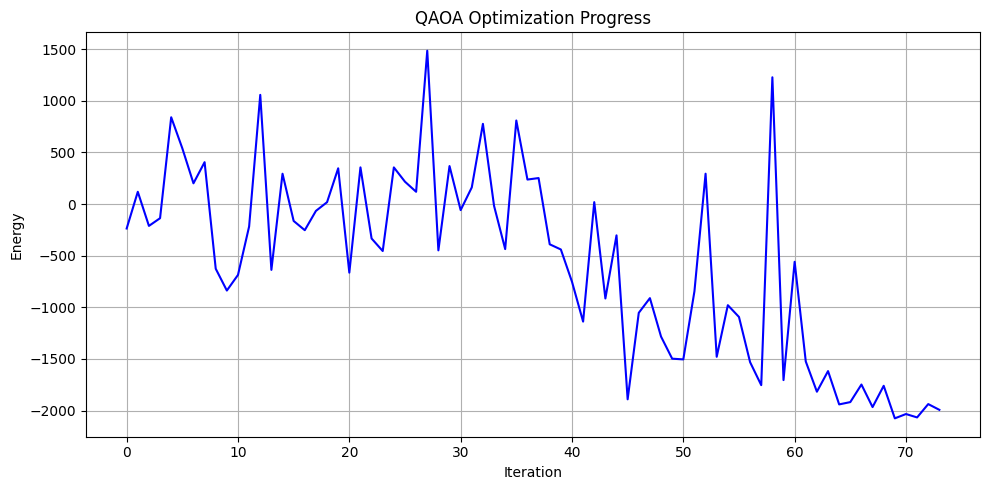

Map with OSRM routing saved to qaoa_routes_osrm_map.html


In [6]:

import time
import math
import itertools
import os
import sys
import inspect
import random
import requests
from math import isfinite
import folium
from folium import Popup
import numpy as np
import matplotlib.pyplot as plt

hospital = data["locations"]["hospital"]["coordinates"]
patients = data["locations"]["patients"]
ids = [p["id"] for p in patients]
coord_map = {"H": (hospital["latitude"], hospital["longitude"])}
for p in patients:
    coord_map[p["id"]] = (p["coordinates"]["latitude"], p["coordinates"]["longitude"])

# Distance matrix

distance_dict = {
    'H': {'H': 0.0, 'DT': 8.6285, 'GR': 11.4958, 'R2': 9.4454, 'R3_2': 10.8524, 'IT': 9.6724},
    'DT': {'H': 14.1936, 'DT': 0.0, 'GR': 2.3608, 'R2': 10.922, 'R3_2': 9.238, 'IT': 9.4305},
    'GR': {'H': 17.7848, 'DT': 7.7452, 'GR': 0.0, 'R2': 11.8083, 'R3_2': 10.1243, 'IT': 10.478},
    'R2': {'H': 11.8644, 'DT': 19.6719, 'GR': 15.6608, 'R2': 0.0, 'R3_2': 11.5718, 'IT': 11.5385},
    'R3_2': {'H': 7.3427, 'DT': 12.1719, 'GR': 10.0531, 'R2': 4.0711, 'R3_2': 0.0, 'IT': 5.9308},
    'IT': {'H': 9.2692, 'DT': 9.3984, 'GR': 12.2657, 'R2': 7.318, 'R3_2': 8.725, 'IT': 0.0}
}

n_trips = 2
max_stops = data["problem_description"]["constraints"]["stops_per_trip"]
patients = ids
hospital_id = "H"

# Build QuadraticProgram with assignment formulation and binary slack variables
try:
    from qiskit_optimization import QuadraticProgram
except Exception as e:
    print("Qiskit Optimization not available:", e)
    sys.exit(1)

qp = QuadraticProgram()

# Create binary variables for each patient-trip assignment
for p in patients:
    for t in range(1, n_trips + 1):
        qp.binary_var(name=f"x_{p}_{t}")

# Create binary slack variables for capacity constraints
# We need enough slack variables to represent values from 0 to max_stops
# For max_stops=3, we need 2 binary variables (can represent 0-3)
slack_bits_per_trip = math.ceil(math.log2(max_stops + 1))
print(f"Using {slack_bits_per_trip} binary slack variables per trip")

for t in range(1, n_trips + 1):
    for i in range(slack_bits_per_trip):
        qp.binary_var(name=f"s_{t}_{i}")

# Objective function: minimize total distance
linear_terms = {}
for p in patients:
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        # Hospital to patient and patient to hospital
        linear_terms[var_name] = distance_dict[hospital_id][p] + distance_dict[p][hospital_id]

# Quadratic terms: distances between patients in the same trip
quadratic_terms = {}
for t in range(1, n_trips + 1):
    for i, p1 in enumerate(patients):
        for j, p2 in enumerate(patients):
            if i < j:  # Avoid double counting
                var1 = f"x_{p1}_{t}"
                var2 = f"x_{p2}_{t}"
                # Distance between patients
                quadratic_terms[(var1, var2)] =distance_dict[p1][p2]+ distance_dict[p2][p1]

# Set the objective
qp.minimize(linear=linear_terms, quadratic=quadratic_terms)

# Constraints
# 1. Each patient must be assigned to exactly one trip
for p in patients:
    vars_for_patient = [f"x_{p}_{t}" for t in range(1, n_trips + 1)]
    coeffs = {var: 1 for var in vars_for_patient}
    qp.linear_constraint(linear=coeffs, sense='==', rhs=1, name=f"assign_{p}")

# 2. Each trip can have at most max_stops patients
# Convert inequality to equality using binary slack variables: sum(x) + slack = max_stops
for t in range(1, n_trips + 1):
    vars_for_trip = [f"x_{p}_{t}" for p in patients]
    slack_vars = [f"s_{t}_{i}" for i in range(slack_bits_per_trip)]

    # Create coefficients for the constraint: sum(x) + binary_slack = max_stops
    coeffs = {var: 1 for var in vars_for_trip}

    # Add slack variables with binary encoding
    for i, slack_var in enumerate(slack_vars):
        coeffs[slack_var] = 2**i  # Binary encoding

    qp.linear_constraint(linear=coeffs, sense='==', rhs=max_stops, name=f"capacity_{t}")

print("Quadratic program created with binary slack variables:")
print(qp.prettyprint())


try:
    from qiskit_optimization.algorithms import MinimumEigenOptimizer
    from qiskit_optimization.minimum_eigensolvers import QAOA
    try:
        from qiskit_aer.primitives import SamplerV2
        from qiskit_aer import AerSimulator
    except Exception:
        try:
            from qiskit.primitives import Sampler as SamplerV2
            from qiskit_aer import AerSimulator
        except Exception:
            from qiskit_aer import AerSimulator
            SamplerV2 = None
except Exception as e:
    import traceback
    traceback.print_exc()
    raise RuntimeError("Required Qiskit modules not importable. Consider clean reinstall.") from e


sampler = None
sampler_errs = []
if 'SamplerV2' in globals() and SamplerV2 is not None:
    constructors = [
        lambda: SamplerV2(mode=AerSimulator()),
        lambda: SamplerV2(backend=AerSimulator()),
        lambda: SamplerV2(),
    ]
else:
    constructors = [lambda: AerSimulator()]

for fn in constructors:
    try:
        sampler = fn()
        print("Sampler instantiated using constructor:", fn)
        break
    except Exception as e:
        sampler_errs.append(e)
if sampler is None:
    print("Sampler constructors tried and failed. Errors:")
    for i,e in enumerate(sampler_errs,1):
        print(f"[{i}] {type(e).__name__}: {e}")
    raise RuntimeError("Unable to create sampler instance.")


optimizer = None
try:
    from qiskit_algorithms.optimizers import SPSA, COBYLA
    optimizer = SPSA(maxiter=10,bounds = [(-0.1, 0.1), (-0.1, 0.1)])
    print("Using qiskit SPSA optimizer.")
except Exception:
    try:
        from qiskit_algorithms.optimizers import COBYLA
        optimizer = COBYLA(maxiter=10,bounds = [(-0.1, 0.1), (-0.1, 0.1)])
        print("Using qiskit COBYLA optimizer.")
    except Exception:
        optimizer = None

if optimizer is None:
    from scipy.optimize import minimize as scipy_minimize
    class SciPyOptimizerWrapper:
        def __init__(self, method='COBYLA', options=None):
            self.method = method
            self.options = options or {"maxiter":200}
        def optimize(self, num_vars, objective, initial_point=None):
            def obj_for_scipy(x):
                val = objective(x)
                if isinstance(val, (tuple, list)):
                    return float(val[0])
                return float(val)
            x0 = initial_point if initial_point is not None else [0.0]*num_vars
            res = scipy_minimize(obj_for_scipy, x0, method=self.method, options=self.options)
            return res.x, float(res.fun), getattr(res, "nfev", None)
        def minimize(self, fun, x0, **kwargs):
            method = kwargs.pop("method", self.method)
            options = kwargs.pop("options", self.options)
            res = scipy_minimize(fun, x0, method=method, options=options, **kwargs)
            return res
    optimizer = SciPyOptimizerWrapper(method='COBYLA', options={"maxiter":100})
    print("Using SciPy-based optimizer wrapper.")


loss_history = []

def callback(eval_count, parameters, mean, std):
    loss_history.append(mean)
    print(f"Iteration {eval_count}: Energy = {mean}")


qaoa = None
qaoa_errors = []
attempts = [
    {"sampler": sampler, "optimizer": optimizer, "reps": 4  , "callback": callback},
    {"optimizer": optimizer, "sampler": sampler, "reps": 4 ,"callback": callback },

]

for kwargs in attempts:
    try:
        qaoa = QAOA(**kwargs)
        print("QAOA instantiated with kwargs:", {k: v for k, v in kwargs.items() if k != 'callback'})
        break
    except Exception as e:
        qaoa_errors.append((kwargs, e))

if qaoa is None:
    print("QAOA instantiation attempts failed. Summary:")
    for kw,e in qaoa_errors:
        print("Attempt:", {k: v for k, v in kw.items() if k != 'callback'})
        print(" ->", type(e).__name__, e)
    raise RuntimeError("Could not instantiate QAOA with tested signatures.")


try:
    meo = MinimumEigenOptimizer(min_eigen_solver=qaoa)
except TypeError:
    meo = MinimumEigenOptimizer(qaoa)

print("Running MinimumEigenOptimizer (QAOA) ...")
t0 = time.time()
result = meo.solve(qp)
t1 = time.time()
elapsed = t1 - t0

print(f"Finished in {elapsed:.3f} s. Status: {result.status}")
print(f"QuadraticProgram objective (raw): {result.fval:.6f}")

# Extract and interpret solution with binary slack variables

print("\nSolution interpretation:")
print("Variable values:")
for var_name, value in result.variables_dict.items():
    print(f"  {var_name}: {value}")

# Extract which patients are assigned to which trips
assignments = {}
for t in range(1, n_trips + 1):
    assignments[t] = []
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignments[t].append(p)

# Extract and decode binary slack variables
slack_values = {}
for t in range(1, n_trips + 1):
    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i
    slack_values[t] = slack_binary
    print(f"Trip {t} slack (binary decoded): {slack_binary}")

print("\nPatient assignments:")
for t, patients_in_trip in assignments.items():
    capacity_used = len(patients_in_trip)
    slack_value = slack_values.get(t, 0)
    print(f"Trip {t}: {patients_in_trip} (Capacity used: {capacity_used}/3, Slack: {slack_value})")
    print(f"  Constraint check: {capacity_used} + {slack_value} = {capacity_used + slack_value} (should be 3)")

# Calculate actual distance for each trip
total_distance = 0
trip_details = {}
for t, patients_in_trip in assignments.items():
    if not patients_in_trip:
        continue

    # Find optimal permutation for this trip
    best_perm = None
    best_distance = float('inf')

    for perm in itertools.permutations(patients_in_trip):
        dist = distance_dict[hospital_id][perm[0]]
        for i in range(len(perm) - 1):
            dist += distance_dict[perm[i]][perm[i+1]]
        dist += distance_dict[perm[-1]][hospital_id]

        if dist < best_distance:
            best_distance = dist
            best_perm = perm

    total_distance += best_distance
    trip_details[t] = {
        'patients': best_perm,
        'distance': best_distance
    }

    print(f"Trip {t} optimal route: H -> {' -> '.join(best_perm)} -> H, Distance: {best_distance:.4f} km")

print(f"\nTotal distance: {total_distance:.4f} km")

# Check constraint satisfaction
constraints_satisfied = True
print("\nConstraint satisfaction check:")

# Check patient assignment constraints
for p in patients:
    assignment_count = 0
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignment_count += 1
    print(f"Patient {p} assigned to {assignment_count} trips: {'OK' if assignment_count == 1 else 'VIOLATION'}")
    if assignment_count != 1:
        constraints_satisfied = False

# Check capacity constraints with binary slack
for t in range(1, n_trips + 1):
    patient_count = 0
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            patient_count += 1

    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i

    constraint_value = patient_count + slack_binary
    print(f"Trip {t}: {patient_count} patients + {slack_binary} slack = {constraint_value}: {'OK' if constraint_value == max_stops else 'VIOLATION'}")
    if constraint_value != max_stops:
        constraints_satisfied = False

print(f"\nAll constraints satisfied: {constraints_satisfied}")


# Plot loss curve
if loss_history:
    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, 'b-', linewidth=1.5)
    plt.title('QAOA Optimization Progress')
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('qaoa_loss_curve.png')
    plt.show()
else:
    print("No loss history recorded")

def osrm_route(coords):
    """
    Query OSRM public server for a route between given coordinates.
    coords: list of (lat, lon) tuples
    Returns: list of (lat, lon) points for the route polyline
    """
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    # OSRM expects lon,lat order
    coord_str = ";".join([f"{lon},{lat}" for lat, lon in coords])
    url = f"{base_url}{coord_str}?overview=full&geometries=geojson"
    try:
        r = requests.get(url)
        r.raise_for_status()
        data = r.json()
        if "routes" in data and len(data["routes"]) > 0:
            return [(lat, lon) for lon, lat in data["routes"][0]["geometry"]["coordinates"]]
    except Exception as e:
        print(f"OSRM request failed: {e}")
    return coords  # fallback: straight line if OSRM fails


# Center map at the hospital
hospital_coords = (hospital["latitude"], hospital["longitude"])
m = folium.Map(location=hospital_coords, zoom_start=13)

# Add hospital marker
folium.Marker(
    location=hospital_coords,
    popup="Hospital",
    icon=folium.Icon(color="red", icon="plus", prefix="fa"),
).add_to(m)

# Add patient markers
for p in data["locations"]["patients"]:
    folium.Marker(
        location=(p["coordinates"]["latitude"], p["coordinates"]["longitude"]),
        popup=f"Patient {p['id']}",
        icon=folium.Icon(color="blue", icon="user", prefix="fa"),
    ).add_to(m)

# Add trip paths with OSRM routing
colors = ["green", "purple", "orange", "darkblue", "darkred"]
for t, details in trip_details.items():
    if "patients" not in details:
        continue

    route = [hospital_coords]  # start at hospital
    for p in details["patients"]:
        route.append(coord_map[p])
    route.append(hospital_coords)  # return to hospital

    # Query OSRM for this trip route
    osrm_path = osrm_route(route)

    folium.PolyLine(
        locations=osrm_path,
        color=colors[(t - 1) % len(colors)],
        weight=4,
        opacity=0.8,
        tooltip=f"Trip {t}, Distance {details['distance']:.2f} km"
    ).add_to(m)

# Save to HTML
m.save("qaoa_routes_osrm_map.html")
print("Map with OSRM routing saved to qaoa_routes_osrm_map.html")


running it 10 times to plot the graphs


=== Iteration 1 ===
Iteration 1: Energy = (778.9336757812496+0j)
Iteration 2: Energy = (-561.8711259765621+0j)
Iteration 3: Energy = (199.5100908203125+0j)
Iteration 4: Energy = (-100.07692001953133+0j)
Iteration 5: Energy = (202.72326337890638+0j)
Iteration 6: Energy = (-136.90228271484386+0j)
Iteration 7: Energy = (-454.96729658203077+0j)
Iteration 8: Energy = (-525.5644226562498+0j)
Iteration 9: Energy = (-27.98418525390614+0j)
Iteration 10: Energy = (2348.416371972661+0j)
Iteration 11: Energy = (60.534924804687265+0j)
Iteration 12: Energy = (-377.6441551757815+0j)
Iteration 13: Energy = (-138.15252832031265+0j)
Iteration 14: Energy = (-165.6122897460936+0j)
Iteration 15: Energy = (5.408460058593803+0j)
Iteration 16: Energy = (-187.6273256835935+0j)
Iteration 17: Energy = (-63.005469921875005+0j)
Iteration 18: Energy = (-273.15857949218724+0j)
Iteration 19: Energy = (-232.26073603515613+0j)
Iteration 20: Energy = (-663.9450437499997+0j)
Iteration 21: Energy = (205.02381728515633+0j

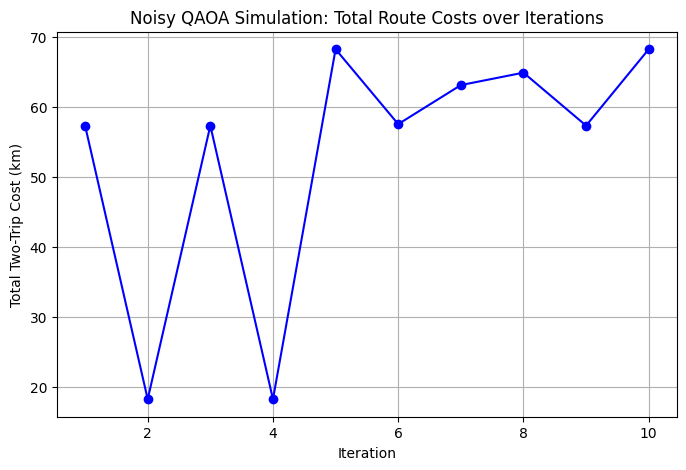

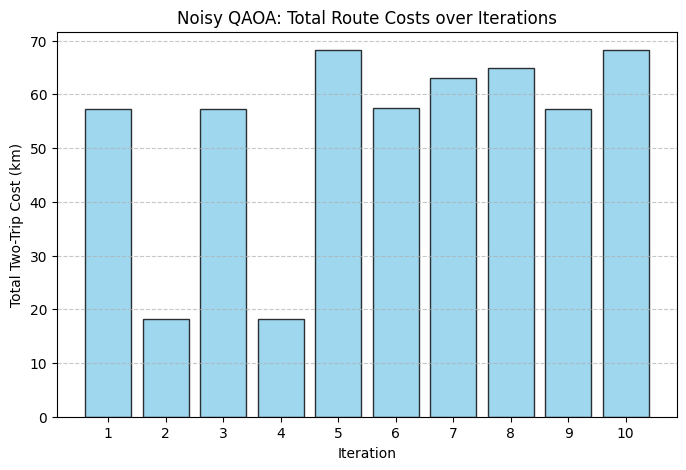

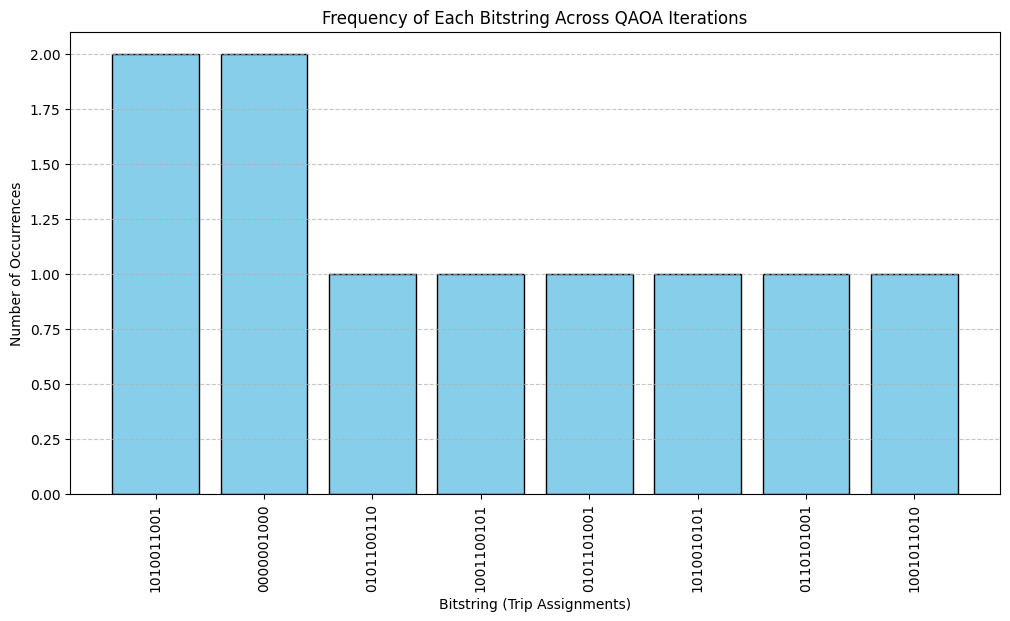

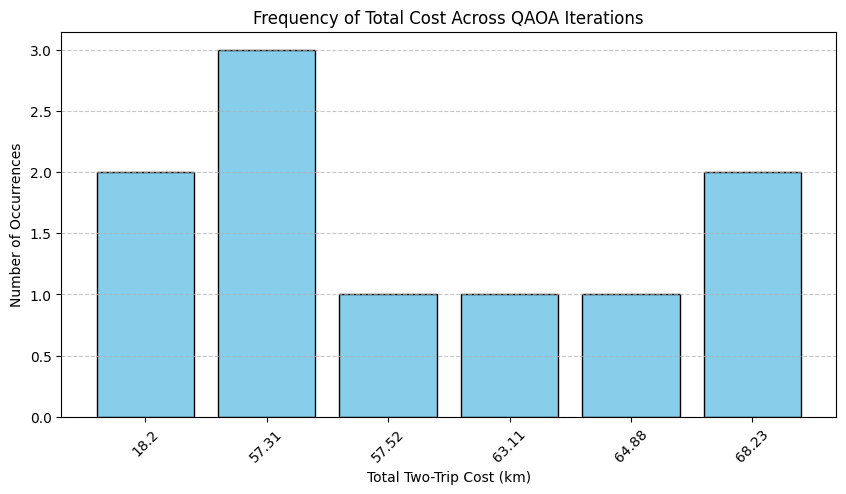

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import copy
import time

n_iterations = 10
results = []

for itr in range(1, n_iterations + 1):
    print(f"\n=== Iteration {itr} ===")
    # If needed, re-instantiate QAOA optimizer to reset state
    qaoa_copy = copy.deepcopy(qaoa)
    meo_copy = MinimumEigenOptimizer(min_eigen_solver=qaoa_copy)

    t0 = time.time()
    result_itr = meo_copy.solve(qp)
    t1 = time.time()

    elapsed = t1 - t0
    print(f"Iteration {itr} finished in {elapsed:.3f} s. Status: {result_itr.status}")

    # Extract patient assignments for this iteration
    assignments_itr = {}
    for t in range(1, n_trips + 1):
        assignments_itr[t] = []
        for p in patients:
            var_name = f"x_{p}_{t}"
            if var_name in result_itr.variables_dict and abs(result_itr.variables_dict[var_name] - 1) < 1e-6:
                assignments_itr[t].append(p)

    # Compute total distance for this iteration
    total_distance = 0
    for t, patients_in_trip in assignments_itr.items():
        if not patients_in_trip:
            continue
        best_distance = float('inf')
        for perm in itertools.permutations(patients_in_trip):
            dist = distance_dict[hospital_id][perm[0]]
            for i in range(len(perm) - 1):
                dist += distance_dict[perm[i]][perm[i+1]]
            dist += distance_dict[perm[-1]][hospital_id]
            if dist < best_distance:
                best_distance = dist
        total_distance += best_distance

    # Create a pseudo "bitstring" for the assignment
    bitstring = ''.join([''.join([str(int(abs(result_itr.variables_dict[f"x_{p}_{t}"] - 1) < 1e-6)) for t in range(1, n_trips+1)]) for p in patients])

    results.append({
        "iteration": itr,
        "total_cost": total_distance,
        "bitstring": bitstring
    })

# -------------------------
# Plot total costs over iterations
# -------------------------
total_costs = [r["total_cost"] for r in results]
iterations = list(range(1, len(total_costs) + 1))

plt.figure(figsize=(8,5))
plt.plot(iterations, total_costs, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Total Two-Trip Cost (km)")
plt.title("Noisy QAOA Simulation: Total Route Costs over Iterations")
plt.grid(True)
plt.show()

# Bar plot of total costs
plt.figure(figsize=(8,5))
plt.bar(iterations, total_costs, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Iteration")
plt.ylabel("Total Two-Trip Cost (km)")
plt.title("Noisy QAOA: Total Route Costs over Iterations")
plt.xticks(iterations)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -------------------------
# Bitstring frequency plot
# -------------------------
bitstrings = [r["bitstring"] for r in results]
counts = Counter(bitstrings)
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, frequencies = zip(*sorted_items)

plt.figure(figsize=(12,6))
plt.bar(labels, frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Bitstring (Trip Assignments)")
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Each Bitstring Across QAOA Iterations")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -------------------------
# Frequency of total costs
# -------------------------
rounded_costs = [round(c, 2) for c in total_costs]
counts = Counter(rounded_costs)
sorted_items = sorted(counts.items())
cost_values, frequencies = zip(*sorted_items)

plt.figure(figsize=(10,5))
plt.bar([str(c) for c in cost_values], frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Total Two-Trip Cost (km)")
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Total Cost Across QAOA Iterations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Running it with the noise simulator

Seconds since epoch: 1757592255.2469275
Using 2 binary slack variables per trip
Quadratic program created with binary slack variables:
Problem name: 

Minimize
  10.106*x_DT_1*x_GR_1 + 18.8289*x_DT_1*x_IT_1 + 30.5939*x_DT_1*x_R2_1
  + 21.4099*x_DT_1*x_R3_2_1 + 10.106*x_DT_2*x_GR_2 + 18.8289*x_DT_2*x_IT_2
  + 30.5939*x_DT_2*x_R2_2 + 21.4099*x_DT_2*x_R3_2_2 + 22.7437*x_GR_1*x_IT_1
  + 27.469099999999997*x_GR_1*x_R2_1 + 20.1774*x_GR_1*x_R3_2_1
  + 22.7437*x_GR_2*x_IT_2 + 27.469099999999997*x_GR_2*x_R2_2
  + 20.1774*x_GR_2*x_R3_2_2 + 18.8565*x_R2_1*x_IT_1
  + 15.642900000000001*x_R2_1*x_R3_2_1 + 18.8565*x_R2_2*x_IT_2
  + 15.642900000000001*x_R2_2*x_R3_2_2 + 14.6558*x_R3_2_1*x_IT_1
  + 14.6558*x_R3_2_2*x_IT_2 + 22.8221*x_DT_1 + 22.8221*x_DT_2 + 29.2806*x_GR_1
  + 29.2806*x_GR_2 + 18.9416*x_IT_1 + 18.9416*x_IT_2 + 21.3098*x_R2_1
  + 21.3098*x_R2_2 + 18.1951*x_R3_2_1 + 18.1951*x_R3_2_2

Subject to
  Linear constraints (7)
    x_DT_1 + x_DT_2 == 1  'assign_DT'
    x_GR_1 + x_GR_2 == 1  'assign

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 1: Energy = (1021.4797449218745+0j)
Iteration 2: Energy = (-1526.7744545898424+0j)
Iteration 3: Energy = (-781.4766749023427+0j)
Iteration 4: Energy = (695.7802783203119+0j)
Iteration 5: Energy = (1428.2569359374986+0j)
Iteration 6: Energy = (-99.39623857421894+0j)
Iteration 7: Energy = (511.4094524414055+0j)
Iteration 8: Energy = (-206.49971201171869+0j)
Iteration 9: Energy = (-442.9184440429687+0j)
Iteration 10: Energy = (-260.9349674804686+0j)
Iteration 11: Energy = (40.245433007812494+0j)
Iteration 12: Energy = (-1413.189015722655+0j)
Iteration 13: Energy = (-82.85738642578097+0j)
Iteration 14: Energy = (-1599.8801796874995+0j)
Iteration 15: Energy = (-943.0752088867196+0j)
Iteration 16: Energy = (1747.348321777346+0j)
Iteration 17: Energy = (-197.89896357421875+0j)
Iteration 18: Energy = (-37.61038300781239+0j)
Iteration 19: Energy = (-1980.8880530273416+0j)
Iteration 20: Energy = (-274.19738046874954+0j)
Iteration 21: Energy = (-904.7046997070305+0j)
Iteration 22: Energ

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


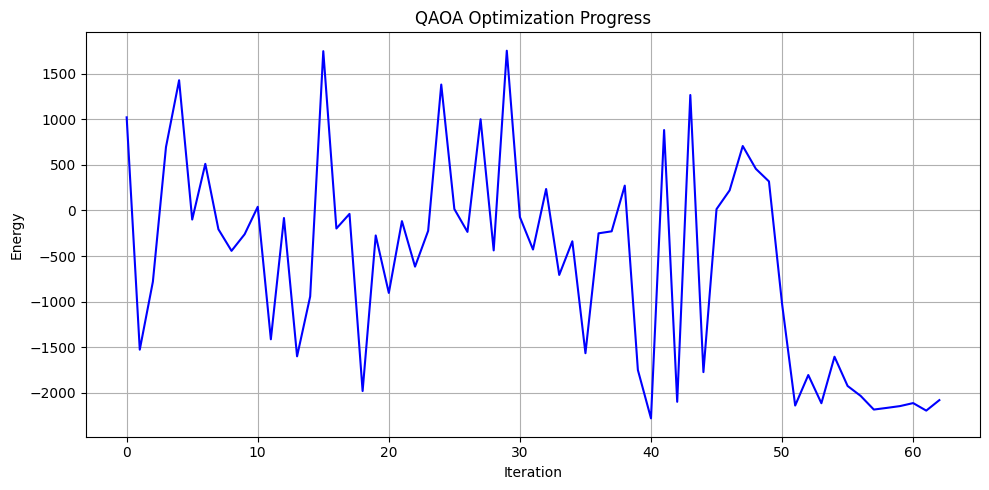

Map with OSRM routing saved to qaoa_routes_osrm_map.html


In [ ]:

import time
import math
import itertools
import os
import sys
import inspect
import random
import requests
from math import isfinite
import folium
from folium import Popup
import numpy as np
import matplotlib.pyplot as plt
import time
from qiskit_aer.noise import NoiseModel
from qiskit_aer import AerSimulator
from qiskit_aer.noise import pauli_error
from qiskit_aer.noise import depolarizing_error

# Create a simple depolarizing noise model
noise_model = NoiseModel()

# Single-qubit depolarizing error
p1 = 0.01
single_qubit_error = depolarizing_error(p1, 1)
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['u1', 'u2', 'u3'])

# Two-qubit depolarizing error
p2 = 0.02
two_qubit_error = depolarizing_error(p2, 2)
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# Noisy simulator backend
noisy_backend = AerSimulator(noise_model=noise_model)
current_time_seconds = time.time()
print(f"Seconds since epoch: {current_time_seconds}")


hospital = data["locations"]["hospital"]["coordinates"]
patients = data["locations"]["patients"]
ids = [p["id"] for p in patients]
coord_map = {"H": (hospital["latitude"], hospital["longitude"])}
for p in patients:
    coord_map[p["id"]] = (p["coordinates"]["latitude"], p["coordinates"]["longitude"])

# Distance matrix

distance_dict = {
    'H': {'H': 0.0, 'DT': 8.6285, 'GR': 11.4958, 'R2': 9.4454, 'R3_2': 10.8524, 'IT': 9.6724},
    'DT': {'H': 14.1936, 'DT': 0.0, 'GR': 2.3608, 'R2': 10.922, 'R3_2': 9.238, 'IT': 9.4305},
    'GR': {'H': 17.7848, 'DT': 7.7452, 'GR': 0.0, 'R2': 11.8083, 'R3_2': 10.1243, 'IT': 10.478},
    'R2': {'H': 11.8644, 'DT': 19.6719, 'GR': 15.6608, 'R2': 0.0, 'R3_2': 11.5718, 'IT': 11.5385},
    'R3_2': {'H': 7.3427, 'DT': 12.1719, 'GR': 10.0531, 'R2': 4.0711, 'R3_2': 0.0, 'IT': 5.9308},
    'IT': {'H': 9.2692, 'DT': 9.3984, 'GR': 12.2657, 'R2': 7.318, 'R3_2': 8.725, 'IT': 0.0}
}

n_trips = 2
max_stops = data["problem_description"]["constraints"]["stops_per_trip"]
patients = ids
hospital_id = "H"

# Build QuadraticProgram with assignment formulation and binary slack variables
try:
    from qiskit_optimization import QuadraticProgram
except Exception as e:
    print("Qiskit Optimization not available:", e)
    sys.exit(1)

qp = QuadraticProgram()

# Create binary variables for each patient-trip assignment
for p in patients:
    for t in range(1, n_trips + 1):
        qp.binary_var(name=f"x_{p}_{t}")

# Create binary slack variables for capacity constraints
# We need enough slack variables to represent values from 0 to max_stops
# For max_stops=3, we need 2 binary variables (can represent 0-3)
slack_bits_per_trip = math.ceil(math.log2(max_stops + 1))
print(f"Using {slack_bits_per_trip} binary slack variables per trip")

for t in range(1, n_trips + 1):
    for i in range(slack_bits_per_trip):
        qp.binary_var(name=f"s_{t}_{i}")

# Objective function: minimize total distance
linear_terms = {}
for p in patients:
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        # Hospital to patient and patient to hospital
        linear_terms[var_name] = distance_dict[hospital_id][p] + distance_dict[p][hospital_id]

# Quadratic terms: distances between patients in the same trip
quadratic_terms = {}
for t in range(1, n_trips + 1):
    for i, p1 in enumerate(patients):
        for j, p2 in enumerate(patients):
            if i < j:  # Avoid double counting
                var1 = f"x_{p1}_{t}"
                var2 = f"x_{p2}_{t}"
                # Distance between patients
                quadratic_terms[(var1, var2)] =distance_dict[p1][p2]+ distance_dict[p2][p1]

# Set the objective
qp.minimize(linear=linear_terms, quadratic=quadratic_terms)

# Constraints
# 1. Each patient must be assigned to exactly one trip
for p in patients:
    vars_for_patient = [f"x_{p}_{t}" for t in range(1, n_trips + 1)]
    coeffs = {var: 1 for var in vars_for_patient}
    qp.linear_constraint(linear=coeffs, sense='==', rhs=1, name=f"assign_{p}")

# 2. Each trip can have at most max_stops patients
# Convert inequality to equality using binary slack variables: sum(x) + slack = max_stops
for t in range(1, n_trips + 1):
    vars_for_trip = [f"x_{p}_{t}" for p in patients]
    slack_vars = [f"s_{t}_{i}" for i in range(slack_bits_per_trip)]

    # Create coefficients for the constraint: sum(x) + binary_slack = max_stops
    coeffs = {var: 1 for var in vars_for_trip}

    # Add slack variables with binary encoding
    for i, slack_var in enumerate(slack_vars):
        coeffs[slack_var] = 2**i  # Binary encoding

    qp.linear_constraint(linear=coeffs, sense='==', rhs=max_stops, name=f"capacity_{t}")

print("Quadratic program created with binary slack variables:")
print(qp.prettyprint())


try:
    from qiskit_optimization.algorithms import MinimumEigenOptimizer
    from qiskit_optimization.minimum_eigensolvers import QAOA
    try:
        from qiskit_aer.primitives import SamplerV2
        from qiskit_aer import AerSimulator
    except Exception:
        try:
            from qiskit.primitives import Sampler as SamplerV2
            from qiskit_aer import AerSimulator
        except Exception:
            from qiskit_aer import AerSimulator
            SamplerV2 = None
except Exception as e:
    import traceback
    traceback.print_exc()
    raise RuntimeError("Required Qiskit modules not importable. Consider clean reinstall.") from e


# sampler = None
# sampler_errs = []
# if 'SamplerV2' in globals() and SamplerV2 is not None:
#     constructors = [
#         lambda: SamplerV2(mode=AerSimulator()),
#         lambda: SamplerV2(backend=AerSimulator()),
#         lambda: SamplerV2(),
#     ]
# else:
#     constructors = [lambda: AerSimulator()]

# for fn in constructors:
#     try:
#         sampler = fn()
#         print("Sampler instantiated using constructor:", fn)
#         break
#     except Exception as e:
#         sampler_errs.append(e)
# if sampler is None:
#     print("Sampler constructors tried and failed. Errors:")
#     for i,e in enumerate(sampler_errs,1):
#         print(f"[{i}] {type(e).__name__}: {e}")
#     raise RuntimeError("Unable to create sampler instance.")\

# Build a simple noise model
def build_noise_model():
    """Creates a basic noise model with depolarizing errors."""
    p_gate1 = 0.001  # 0.1% error on single-qubit gates
    p_gate2 = 0.01   # 1% error on two-qubit gates
    error_gate1 = depolarizing_error(p_gate1, 1)
    error_gate2 = depolarizing_error(p_gate2, 2)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['u1', 'u2', 'u3', 'rx', 'ry', 'rz'])
    noise_model.add_all_qubit_quantum_error(error_gate2, ['cx'])
    print("Successfully built a basic noise model with depolarizing errors.")
    return noise_model

# --- MODIFIED: Configure sampler with noise model via options dictionary ---
noise_model = build_noise_model()


# These `backend_options` are passed directly to the AerSimulator when it runs.
sampler_options = {
    "backend_options": {
        "noise_model": noise_model
    }
}




optimizer = None
try:
    from qiskit_algorithms.optimizers import SPSA, COBYLA
    optimizer = SPSA(maxiter=10,bounds = [(-0.1, 0.1), (-0.1, 0.1)])
    print("Using qiskit SPSA optimizer.")
except Exception:
    try:
        from qiskit_algorithms.optimizers import COBYLA
        optimizer = COBYLA(maxiter=10,bounds = [(-0.1, 0.1), (-0.1, 0.1)])
        print("Using qiskit COBYLA optimizer.")
    except Exception:
        optimizer = None

if optimizer is None:
    from scipy.optimize import minimize as scipy_minimize
    class SciPyOptimizerWrapper:
        def __init__(self, method='COBYLA', options=None):
            self.method = method
            self.options = options or {"maxiter":200}
        def optimize(self, num_vars, objective, initial_point=None):
            def obj_for_scipy(x):
                val = objective(x)
                if isinstance(val, (tuple, list)):
                    return float(val[0])
                return float(val)
            x0 = initial_point if initial_point is not None else [0.0]*num_vars
            res = scipy_minimize(obj_for_scipy, x0, method=self.method, options=self.options)
            return res.x, float(res.fun), getattr(res, "nfev", None)
        def minimize(self, fun, x0, **kwargs):
            method = kwargs.pop("method", self.method)
            options = kwargs.pop("options", self.options)
            res = scipy_minimize(fun, x0, method=method, options=options, **kwargs)
            return res
    optimizer = SciPyOptimizerWrapper(method='COBYLA', options={"maxiter":100})
    print("Using SciPy-based optimizer wrapper.")


loss_history = []

def callback(eval_count, parameters, mean, std):
    loss_history.append(mean)
    print(f"Iteration {eval_count}: Energy = {mean}")


qaoa = None
qaoa_errors = []
attempts = [
    {"sampler": sampler, "optimizer": optimizer, "reps": 4  , "callback": callback},
    {"optimizer": optimizer, "sampler": sampler, "reps": 4 ,"callback": callback },

]

for kwargs in attempts:
    try:
        qaoa = QAOA(**kwargs)
        print("QAOA instantiated with kwargs:", {k: v for k, v in kwargs.items() if k != 'callback'})
        break
    except Exception as e:
        qaoa_errors.append((kwargs, e))

if qaoa is None:
    print("QAOA instantiation attempts failed. Summary:")
    for kw,e in qaoa_errors:
        print("Attempt:", {k: v for k, v in kw.items() if k != 'callback'})
        print(" ->", type(e).__name__, e)
    raise RuntimeError("Could not instantiate QAOA with tested signatures.")


try:
    meo = MinimumEigenOptimizer(min_eigen_solver=qaoa)
except TypeError:
    meo = MinimumEigenOptimizer(qaoa)

print("Running MinimumEigenOptimizer (QAOA) ...")
t0 = time.time()
result = meo.solve(qp)
t1 = time.time()
elapsed = t1 - t0

print(f"Finished in {elapsed:.3f} s. Status: {result.status}")
print(f"QuadraticProgram objective (raw): {result.fval:.6f}")

# Extract and interpret solution with binary slack variables

print("\nSolution interpretation:")
print("Variable values:")
for var_name, value in result.variables_dict.items():
    print(f"  {var_name}: {value}")

# Extract which patients are assigned to which trips
assignments = {}
for t in range(1, n_trips + 1):
    assignments[t] = []
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignments[t].append(p)

# Extract and decode binary slack variables
slack_values = {}
for t in range(1, n_trips + 1):
    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i
    slack_values[t] = slack_binary
    print(f"Trip {t} slack (binary decoded): {slack_binary}")

print("\nPatient assignments:")
for t, patients_in_trip in assignments.items():
    capacity_used = len(patients_in_trip)
    slack_value = slack_values.get(t, 0)
    print(f"Trip {t}: {patients_in_trip} (Capacity used: {capacity_used}/3, Slack: {slack_value})")
    print(f"  Constraint check: {capacity_used} + {slack_value} = {capacity_used + slack_value} (should be 3)")

# Calculate actual distance for each trip
total_distance = 0
trip_details = {}
for t, patients_in_trip in assignments.items():
    if not patients_in_trip:
        continue

    # Find optimal permutation for this trip
    best_perm = None
    best_distance = float('inf')

    for perm in itertools.permutations(patients_in_trip):
        dist = distance_dict[hospital_id][perm[0]]
        for i in range(len(perm) - 1):
            dist += distance_dict[perm[i]][perm[i+1]]
        dist += distance_dict[perm[-1]][hospital_id]

        if dist < best_distance:
            best_distance = dist
            best_perm = perm

    total_distance += best_distance
    trip_details[t] = {
        'patients': best_perm,
        'distance': best_distance
    }

    print(f"Trip {t} optimal route: H -> {' -> '.join(best_perm)} -> H, Distance: {best_distance:.4f} km")

print(f"\nTotal distance: {total_distance:.4f} km")

# Check constraint satisfaction
constraints_satisfied = True
print("\nConstraint satisfaction check:")

# Check patient assignment constraints
for p in patients:
    assignment_count = 0
    for t in range(1, n_trips + 1):
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            assignment_count += 1
    print(f"Patient {p} assigned to {assignment_count} trips: {'OK' if assignment_count == 1 else 'VIOLATION'}")
    if assignment_count != 1:
        constraints_satisfied = False

# Check capacity constraints with binary slack
for t in range(1, n_trips + 1):
    patient_count = 0
    for p in patients:
        var_name = f"x_{p}_{t}"
        if var_name in result.variables_dict and abs(result.variables_dict[var_name] - 1) < 1e-6:
            patient_count += 1

    slack_binary = 0
    for i in range(slack_bits_per_trip):
        slack_var = f"s_{t}_{i}"
        if slack_var in result.variables_dict and abs(result.variables_dict[slack_var] - 1) < 1e-6:
            slack_binary += 2**i

    constraint_value = patient_count + slack_binary
    print(f"Trip {t}: {patient_count} patients + {slack_binary} slack = {constraint_value}: {'OK' if constraint_value == max_stops else 'VIOLATION'}")
    if constraint_value != max_stops:
        constraints_satisfied = False

print(f"\nAll constraints satisfied: {constraints_satisfied}")


current_time_seconds = time.time()
print(f"finsh the jop: {current_time_seconds}")
# Plot loss curve
if loss_history:
    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, 'b-', linewidth=1.5)
    plt.title('QAOA Optimization Progress')
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('qaoa_loss_curve.png')
    plt.show()
else:
    print("No loss history recorded")

def osrm_route(coords):
    """
    Query OSRM public server for a route between given coordinates.
    coords: list of (lat, lon) tuples
    Returns: list of (lat, lon) points for the route polyline
    """
    base_url = "http://router.project-osrm.org/route/v1/driving/"
    # OSRM expects lon,lat order
    coord_str = ";".join([f"{lon},{lat}" for lat, lon in coords])
    url = f"{base_url}{coord_str}?overview=full&geometries=geojson"
    try:
        r = requests.get(url)
        r.raise_for_status()
        data = r.json()
        if "routes" in data and len(data["routes"]) > 0:
            return [(lat, lon) for lon, lat in data["routes"][0]["geometry"]["coordinates"]]
    except Exception as e:
        print(f"OSRM request failed: {e}")
    return coords  # fallback: straight line if OSRM fails


# Center map at the hospital
hospital_coords = (hospital["latitude"], hospital["longitude"])
m = folium.Map(location=hospital_coords, zoom_start=13)

# Add hospital marker
folium.Marker(
    location=hospital_coords,
    popup="Hospital",
    icon=folium.Icon(color="red", icon="plus", prefix="fa"),
).add_to(m)

# Add patient markers
for p in data["locations"]["patients"]:
    folium.Marker(
        location=(p["coordinates"]["latitude"], p["coordinates"]["longitude"]),
        popup=f"Patient {p['id']}",
        icon=folium.Icon(color="blue", icon="user", prefix="fa"),
    ).add_to(m)

# Add trip paths with OSRM routing
colors = ["green", "purple", "orange", "darkblue", "darkred"]
for t, details in trip_details.items():
    if "patients" not in details:
        continue

    route = [hospital_coords]  # start at hospital
    for p in details["patients"]:
        route.append(coord_map[p])
    route.append(hospital_coords)  # return to hospital

    # Query OSRM for this trip route
    osrm_path = osrm_route(route)

    folium.PolyLine(
        locations=osrm_path,
        color=colors[(t - 1) % len(colors)],
        weight=4,
        opacity=0.8,
        tooltip=f"Trip {t}, Distance {details['distance']:.2f} km"
    ).add_to(m)

# Save to HTML
m.save("qaoa_routes_osrm_map.html")
print("Map with OSRM routing saved to qaoa_routes_osrm_map.html")


Running the noise simuator for 10 times

In [13]:
n_iterations = 10  # number of noisy QAOA runs
all_results = []
total_costs = []
bitstrings = []

for itr in range(1, n_iterations + 1):
    print(f"\n=== Noisy iteration {itr} ===")
    qaoa_run = QAOA(sampler=sampler, optimizer=optimizer, reps=4, callback=callback)
    meo_run = MinimumEigenOptimizer(qaoa_run)

    t0 = time.time()
    result_run = meo_run.solve(qp)
    t1 = time.time()
    print(f"Iteration {itr} finished in {t1-t0:.2f} s. Status: {result_run.status}")

    # Extract patient-trip assignments
    assignments_run = {}
    for t in range(1, n_trips + 1):
        assignments_run[t] = []
        for p in patients:
            var_name = f"x_{p}_{t}"
            if var_name in result_run.variables_dict and abs(result_run.variables_dict[var_name] - 1) < 1e-6:
                assignments_run[t].append(p)

    # Compute total distance
    total_distance = 0
    for t, patients_in_trip in assignments_run.items():
        if not patients_in_trip:
            continue
        best_distance = float('inf')
        for perm in itertools.permutations(patients_in_trip):
            dist = distance_dict[hospital_id][perm[0]]
            for i in range(len(perm) - 1):
                dist += distance_dict[perm[i]][perm[i+1]]
            dist += distance_dict[perm[-1]][hospital_id]
            if dist < best_distance:
                best_distance = dist
        total_distance += best_distance

    # Bitstring representation
    bitstring = ''.join([''.join([str(int(abs(result_run.variables_dict[f"x_{p}_{t}"] - 1) < 1e-6))
                                   for t in range(1, n_trips+1)]) for p in patients])

    all_results.append(result_run)
    total_costs.append(total_distance)
    bitstrings.append(bitstring)





=== Noisy iteration 1 ===


/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 1: Energy = (-288.4154025390631+0j)
Iteration 2: Energy = (481.3128271484381+0j)
Iteration 3: Energy = (220.18501503906245+0j)
Iteration 4: Energy = (-15.997799707030826+0j)
Iteration 5: Energy = (62.5707693359376+0j)
Iteration 6: Energy = (845.4379191406234+0j)
Iteration 7: Energy = (-103.92196796875024+0j)
Iteration 8: Energy = (106.53692714843743+0j)
Iteration 9: Energy = (-133.43039169921875+0j)
Iteration 10: Energy = (-317.23023964843753+0j)
Iteration 11: Energy = (-138.69238486328092+0j)
Iteration 12: Energy = (-428.3501114257814+0j)
Iteration 13: Energy = (102.86084228515618+0j)
Iteration 14: Energy = (57.02580898437513+0j)
Iteration 15: Energy = (717.8528573242186+0j)
Iteration 16: Energy = (280.9181240234373+0j)
Iteration 17: Energy = (251.91237041015648+0j)
Iteration 18: Energy = (-932.8006474609379+0j)
Iteration 19: Energy = (262.8219506835941+0j)
Iteration 20: Energy = (1310.7202599609382+0j)
Iteration 21: Energy = (839.7735828125012+0j)
Iteration 22: Energy = (10

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (281.94343066406316+0j)
Iteration 4: Energy = (210.7001060546876+0j)
Iteration 5: Energy = (234.1746212890624+0j)
Iteration 6: Energy = (1022.8291584960934+0j)
Iteration 7: Energy = (45.82093056640629+0j)
Iteration 8: Energy = (669.3368837890641+0j)
Iteration 9: Energy = (-536.2506655273443+0j)
Iteration 10: Energy = (-34.979213085937545+0j)
Iteration 11: Energy = (170.42868144531275+0j)
Iteration 12: Energy = (-333.1966276367181+0j)
Iteration 13: Energy = (-173.92253525390615+0j)
Iteration 14: Energy = (553.1149028320311+0j)
Iteration 15: Energy = (-20.783173242187473+0j)
Iteration 16: Energy = (-450.22796933593776+0j)
Iteration 17: Energy = (-562.8275184570309+0j)
Iteration 18: Energy = (-694.5831608398447+0j)
Iteration 19: Energy = (1037.0816013671877+0j)
Iteration 20: Energy = (-49.882762597656324+0j)
Iteration 21: Energy = (-297.6251579101559+0j)
Iteration 22: Energy = (480.9528586914061+0j)
Iteration 23: Energy = (128.20728593750025+0j)
Iteration 24: Energy 

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (-1565.5164102539043+0j)
Iteration 4: Energy = (684.209756542968+0j)
Iteration 5: Energy = (-305.4583061523439+0j)
Iteration 6: Energy = (269.0795450195309+0j)
Iteration 7: Energy = (197.96845214843745+0j)
Iteration 8: Energy = (-164.65880449218747+0j)
Iteration 9: Energy = (-1520.8724493164027+0j)
Iteration 10: Energy = (555.2573691406253+0j)
Iteration 11: Energy = (-31.939805664062536+0j)
Iteration 12: Energy = (-1646.0500571289058+0j)
Iteration 13: Energy = (-74.02547470703121+0j)
Iteration 14: Energy = (194.20007167968745+0j)
Iteration 15: Energy = (1909.5796230468757+0j)
Iteration 16: Energy = (-172.29147460937483+0j)
Iteration 17: Energy = (3.6347354492188275+0j)
Iteration 18: Energy = (-28.208434277343702+0j)
Iteration 19: Energy = (34.71947832031245+0j)
Iteration 20: Energy = (-1931.0163006835937+0j)
Iteration 21: Energy = (-117.04618740234378+0j)
Iteration 22: Energy = (-310.885253027344+0j)
Iteration 23: Energy = (96.19852226562526+0j)
Iteration 24: Ener

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 2: Energy = (-7.3313187499999515+0j)
Iteration 3: Energy = (1638.9889307617204+0j)
Iteration 4: Energy = (556.0471471679674+0j)
Iteration 5: Energy = (678.1618239257803+0j)
Iteration 6: Energy = (459.87577705078144+0j)
Iteration 7: Energy = (316.30575126953164+0j)
Iteration 8: Energy = (399.8583963867189+0j)
Iteration 9: Energy = (639.8902854492181+0j)
Iteration 10: Energy = (-244.71117216796867+0j)
Iteration 11: Energy = (-36.36258535156247+0j)
Iteration 12: Energy = (783.7642778320323+0j)
Iteration 13: Energy = (120.90685869140627+0j)
Iteration 14: Energy = (148.76822734374983+0j)
Iteration 15: Energy = (7.164383496093838+0j)
Iteration 16: Energy = (36.32358203124996+0j)
Iteration 17: Energy = (-88.42766933593738+0j)
Iteration 18: Energy = (-462.28363896484353+0j)
Iteration 19: Energy = (-5.477101367187571+0j)
Iteration 20: Energy = (206.55371855468744+0j)
Iteration 21: Energy = (-136.39368583984358+0j)
Iteration 22: Energy = (450.17220830078173+0j)
Iteration 23: Energy = (

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 2: Energy = (-316.91015517578126+0j)
Iteration 3: Energy = (-21.718004199218687+0j)
Iteration 4: Energy = (-684.2709446289059+0j)
Iteration 5: Energy = (1014.9811751953127+0j)
Iteration 6: Energy = (-3.2235920898436947+0j)
Iteration 7: Energy = (-1.8078400390625227+0j)
Iteration 8: Energy = (-1172.2661207031263+0j)
Iteration 9: Energy = (-879.3407946289061+0j)
Iteration 10: Energy = (404.2377681640633+0j)
Iteration 11: Energy = (-542.3154556640629+0j)
Iteration 12: Energy = (-611.5071649414058+0j)
Iteration 13: Energy = (108.6079241210937+0j)
Iteration 14: Energy = (-891.5676082031241+0j)
Iteration 15: Energy = (-219.46653779296855+0j)
Iteration 16: Energy = (-200.55076611328113+0j)
Iteration 17: Energy = (-544.100177636719+0j)
Iteration 18: Energy = (725.827195898437+0j)
Iteration 19: Energy = (44.90984208984423+0j)
Iteration 20: Energy = (-643.3725258789063+0j)
Iteration 21: Energy = (1446.7207621093753+0j)
Iteration 22: Energy = (418.4402868164062+0j)
Iteration 23: Energy 

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 1: Energy = (265.11834833984386+0j)
Iteration 2: Energy = (96.08448398437507+0j)
Iteration 3: Energy = (-427.8163487304677+0j)
Iteration 4: Energy = (29.798880566406226+0j)
Iteration 5: Energy = (66.3025967773437+0j)
Iteration 6: Energy = (228.02048544921885+0j)
Iteration 7: Energy = (1177.3105154296866+0j)
Iteration 8: Energy = (-1480.541459277346+0j)
Iteration 9: Energy = (-1354.793134765624+0j)
Iteration 10: Energy = (-497.3214976562496+0j)
Iteration 11: Energy = (974.3080154296883+0j)
Iteration 12: Energy = (-1597.8855988281257+0j)
Iteration 13: Energy = (409.68382626953087+0j)
Iteration 14: Energy = (26.593210644531293+0j)
Iteration 15: Energy = (-357.80457490234414+0j)
Iteration 16: Energy = (-1110.4186432617191+0j)
Iteration 17: Energy = (-486.61611220703134+0j)
Iteration 18: Energy = (-1109.5474262695307+0j)
Iteration 19: Energy = (413.99134287109433+0j)
Iteration 20: Energy = (97.70733857421885+0j)
Iteration 21: Energy = (312.5248194335936+0j)
Iteration 22: Energy = 

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (45.469440332031276+0j)
Iteration 4: Energy = (196.0914477539057+0j)
Iteration 5: Energy = (-332.1099177734376+0j)
Iteration 6: Energy = (296.87463505859387+0j)
Iteration 7: Energy = (-131.5531653320311+0j)
Iteration 8: Energy = (-337.39378535156266+0j)
Iteration 9: Energy = (-597.8120958007809+0j)
Iteration 10: Energy = (224.4266880859372+0j)
Iteration 11: Energy = (-440.4745460937497+0j)
Iteration 12: Energy = (-118.23353994140588+0j)
Iteration 13: Energy = (-280.636268554687+0j)
Iteration 14: Energy = (5.057783496093625+0j)
Iteration 15: Energy = (318.73976103515594+0j)
Iteration 16: Energy = (282.2460517578125+0j)
Iteration 17: Energy = (233.52746376953212+0j)
Iteration 18: Energy = (-53.87478359375002+0j)
Iteration 19: Energy = (102.05974179687507+0j)
Iteration 20: Energy = (-371.6474547851564+0j)
Iteration 21: Energy = (1992.5089227539063+0j)
Iteration 22: Energy = (-789.0141054687494+0j)
Iteration 23: Energy = (-212.55688652343724+0j)
Iteration 24: Energy =

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (324.74256640625015+0j)
Iteration 4: Energy = (968.1853457031254+0j)
Iteration 5: Energy = (239.42154902343765+0j)
Iteration 6: Energy = (-107.99615820312498+0j)
Iteration 7: Energy = (407.8920291015627+0j)
Iteration 8: Energy = (-481.63658388671894+0j)
Iteration 9: Energy = (-281.29894697265587+0j)
Iteration 10: Energy = (-225.93537148437534+0j)
Iteration 11: Energy = (-85.88282412109392+0j)
Iteration 12: Energy = (-611.7257033203125+0j)
Iteration 13: Energy = (-141.5240870117185+0j)
Iteration 14: Energy = (-464.1578695312496+0j)
Iteration 15: Energy = (79.24034179687504+0j)
Iteration 16: Energy = (431.05643095703135+0j)
Iteration 17: Energy = (-817.749845703125+0j)
Iteration 18: Energy = (-167.83580576171855+0j)
Iteration 19: Energy = (1937.6146528320319+0j)
Iteration 20: Energy = (139.9458433593748+0j)
Iteration 21: Energy = (-324.9340823242188+0j)
Iteration 22: Energy = (770.618042187498+0j)
Iteration 23: Energy = (-401.2725965820313+0j)
Iteration 24: Energy =

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (-29.697001171875005+0j)
Iteration 4: Energy = (83.02251337890631+0j)
Iteration 5: Energy = (529.3628335937487+0j)
Iteration 6: Energy = (559.2643864257809+0j)
Iteration 7: Energy = (214.62307675781267+0j)
Iteration 8: Energy = (175.48524462890614+0j)
Iteration 9: Energy = (-219.63105537109354+0j)
Iteration 10: Energy = (-384.4376397460936+0j)
Iteration 11: Energy = (-155.02994082031253+0j)
Iteration 12: Energy = (-400.13960859374976+0j)
Iteration 13: Energy = (432.41101210937524+0j)
Iteration 14: Energy = (810.9524076171866+0j)
Iteration 15: Energy = (-414.0973993164059+0j)
Iteration 16: Energy = (1444.9343208007795+0j)
Iteration 17: Energy = (-40.50269082031256+0j)
Iteration 18: Energy = (-283.91398330078135+0j)
Iteration 19: Energy = (-390.4731119140622+0j)
Iteration 20: Energy = (-140.8959759765625+0j)
Iteration 21: Energy = (-553.6291016601559+0j)
Iteration 22: Energy = (-189.98219521484353+0j)
Iteration 23: Energy = (836.7949047851562+0j)
Iteration 24: Energ

/usr/local/lib/python3.12/dist-packages/qiskit_optimization/minimum_eigensolvers/qaoa.py:122: UserWarning: Using Sampler V2 (other than StatevectorSampler) without a pass_manager may result in an error. Consider providing a pass_manager for proper circuit transpilation.
  super().__init__(


Iteration 3: Energy = (-101.67953749999987+0j)
Iteration 4: Energy = (152.44252138671817+0j)
Iteration 5: Energy = (-79.3044834960938+0j)
Iteration 6: Energy = (240.32770986328154+0j)
Iteration 7: Energy = (147.23584658203114+0j)
Iteration 8: Energy = (28.732063085937597+0j)
Iteration 9: Energy = (146.79696093750016+0j)
Iteration 10: Energy = (-552.2418578125+0j)
Iteration 11: Energy = (-49.10193017578127+0j)
Iteration 12: Energy = (27.58515830078112+0j)
Iteration 13: Energy = (269.91259267578096+0j)
Iteration 14: Energy = (-14.348075976562349+0j)
Iteration 15: Energy = (204.68369736328142+0j)
Iteration 16: Energy = (-95.93169111328113+0j)
Iteration 17: Energy = (-297.242339941406+0j)
Iteration 18: Energy = (95.35527080078128+0j)
Iteration 19: Energy = (50.382822265624846+0j)
Iteration 20: Energy = (-82.70663398437478+0j)
Iteration 21: Energy = (14.083995410156206+0j)
Iteration 22: Energy = (77.95922822265621+0j)
Iteration 23: Energy = (-132.4939946289061+0j)
Iteration 24: Energy = (-3

ploting the noise simulator results

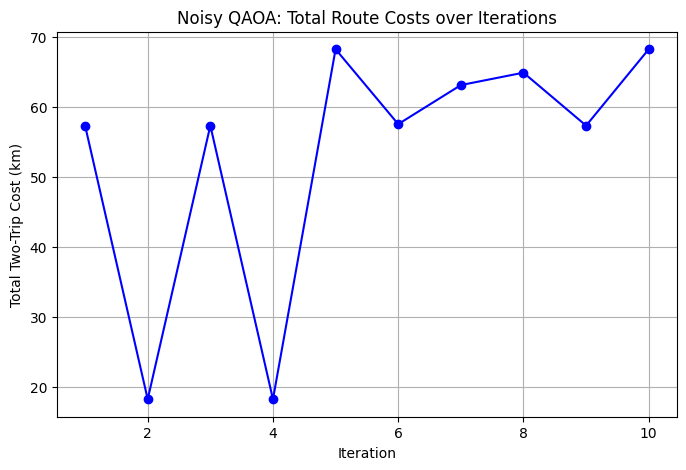

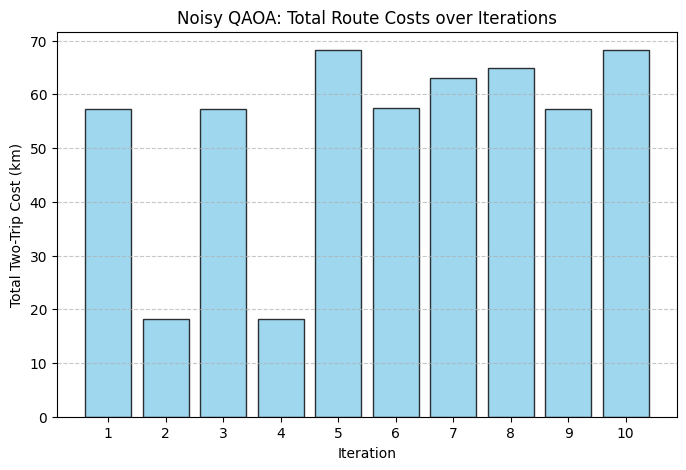

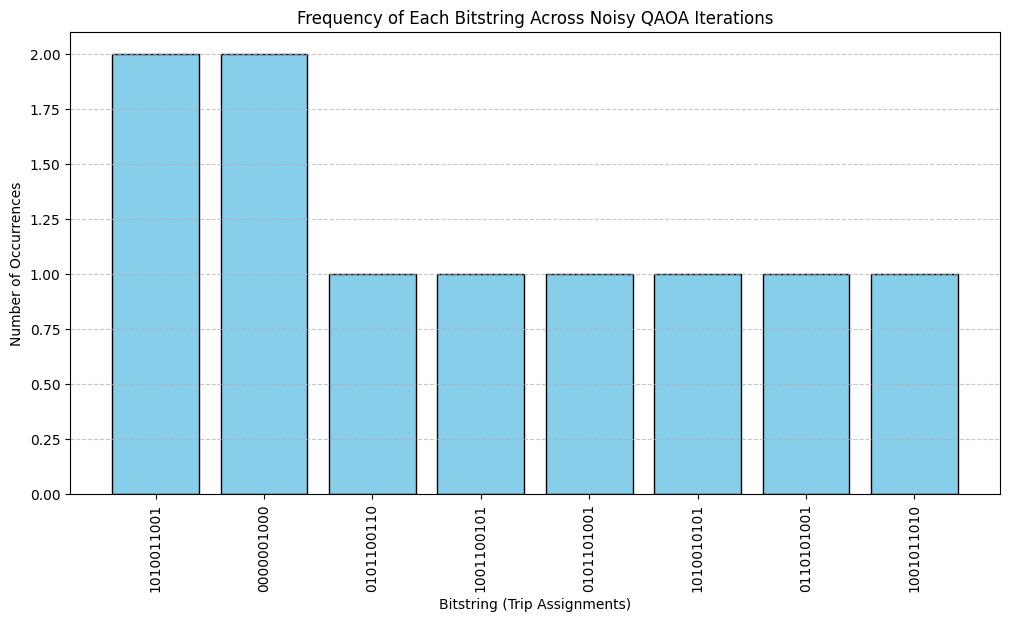

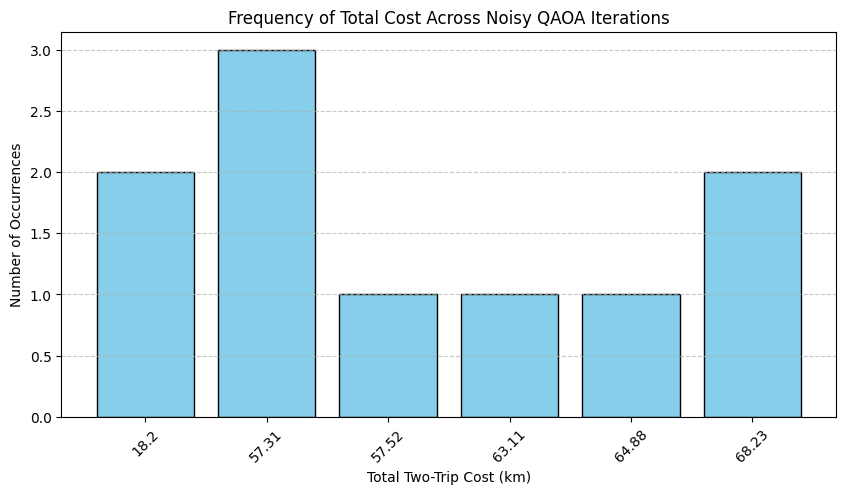

In [14]:
# Total costs over iterations
total_costs = [r["total_cost"] for r in results]
iterations = list(range(1, len(total_costs)+1))

plt.figure(figsize=(8,5))
plt.plot(iterations, total_costs, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Total Two-Trip Cost (km)")
plt.title("Noisy QAOA: Total Route Costs over Iterations")
plt.grid(True)
plt.show()

# Bar plot of total costs
plt.figure(figsize=(8,5))
plt.bar(iterations, total_costs, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Iteration")
plt.ylabel("Total Two-Trip Cost (km)")
plt.title("Noisy QAOA: Total Route Costs over Iterations")
plt.xticks(iterations)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bitstring frequency
bitstrings = [r["bitstring"] for r in results]
counts = Counter(bitstrings)
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels, frequencies = zip(*sorted_items)

plt.figure(figsize=(12,6))
plt.bar(labels, frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Bitstring (Trip Assignments)")
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Each Bitstring Across Noisy QAOA Iterations")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Frequency of total costs
rounded_costs = [round(c, 2) for c in total_costs]
counts = Counter(rounded_costs)
sorted_items = sorted(counts.items())
cost_values, frequencies = zip(*sorted_items)

plt.figure(figsize=(10,5))
plt.bar([str(c) for c in cost_values], frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Total Two-Trip Cost (km)")
plt.ylabel("Number of Occurrences")
plt.title("Frequency of Total Cost Across Noisy QAOA Iterations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
